# Milestone 3

<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>Project:</strong> Decoding Box-Office Bombs 💣
    <br>
    <strong>Team:</strong> ADAdventurers2024
</div>

To replicate our dataset, please download the data indicated in the [README](https://github.com/epfl-ada/ada-2024-project-adaventurers2024/blob/main/README.md) file. Then, navigate to the `scripts` folder and run the following script:

```cmd
python preprocess_data.py
```

This script will generate five files in the data folder:

- `cmu_tmdb.csv`: A merged dataset from CMU and TMDB, containing movie information such as revenue, budget, and other details.
- `movie_tropes.csv`: Tropes associated with each movie in the IMDb dataset, which serves as an intermediary file for merging tropes with the CMU dataset.
- `cmu_tropes.csv`: Tropes associated with each movie in the CMU dataset.
- `movie_actors.csv`: Actors linked to each movie in the CMU dataset.
- `movie_directors_actors.csv`: Directors and actors linked to each movie in the IMDb dataset.

You can now proceed with exploratory data analysis and initial assessments.

------

## Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils.visualization_utils import *

# Setup
setup_visualization()

In [2]:
DATA_PATH = "data"

#### CMU revenue and other metrics

In [3]:
df_cmu_tmdb = pd.read_csv(f"{DATA_PATH}/cmu_tmdb.csv")
df_cmu_tmdb.head()

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path     budget  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  160000000   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  165000000   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  185000000   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  237000000   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  220000000   

                                         homepage    imdb_id  \
0     https://www.warnerbros.com/movies/inception  tt1375666   
1               http://www.interstellarmovie.net/  tt0816692   
2  https://www.warnerbros.com/movies/dark-knight/  tt0468569   
3            https://www.avatar.com/movies/avatar  tt0499549   
4      https://www.marvel.com/movies/the-avengers  tt0848228   

  original_language   original_title  \
0                en        Inception   
1                en     Interstellar   
2                en  The Dark Knight   
3                en           Avatar   
4                en     The Avengers   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   
3  In the 22nd century, a paraplegic Marine is di...      79.932   
4  When an unexpected enemy emerges and threatens...      98.082   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  release_year  \
0  rescue, mission, dream, airplane, paris, franc...          2010   
1  rescue, future, spacecraft, race against time,...          2014   
2  joker, sadism, chaos, secret identity, crime f...          2008   
3  futur

In [4]:
df_cmu_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49519 entries, 0 to 49518
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    49519 non-null  int64  
 1   title                 49519 non-null  object 
 2   vote_average          49519 non-null  float64
 3   vote_count            49519 non-null  int64  
 4   status                49519 non-null  object 
 5   release_date          49519 non-null  object 
 6   revenue               49519 non-null  int64  
 7   runtime               49519 non-null  int64  
 8   adult                 49519 non-null  bool   
 9   backdrop_path         34367 non-null  object 
 10  budget                49519 non-null  int64  
 11  homepage              4220 non-null   object 
 12  imdb_id               49519 non-null  object 
 13  original_language     49519 non-null  object 
 14  original_title        49519 non-null  object 
 15  overview           

#### CMU cast and crew

In [5]:
df_movie_actors = pd.read_csv(f"{DATA_PATH}/movie_actors.csv")
df_movie_actors.head()

wikipedia_movie_id freebase_movie_id release_date_x character_name  \
0              975900         /m/03vyhn     2001-08-24       Akooshay   
1              975900         /m/03vyhn     2001-08-24       Akooshay   
2              975900         /m/03vyhn     2001-08-24       Akooshay   
3              975900         /m/03vyhn     2001-08-24       Akooshay   
4              975900         /m/03vyhn     2001-08-24       Akooshay   

  actor_date_of_birth actor_gender  actor_height_in_meters  \
0          1958-08-26            F                    1.62   
1          1958-08-26            F                    1.62   
2          1958-08-26            F                    1.62   
3          1958-08-26            F                    1.62   
4          1958-08-26            F                    1.62   

  actor_ethnicity_freebase_id      actor_name  actor_age_at_movie_release  \
0                         NaN  Wanda De Jesus                        42.0   
1                         NaN  Wanda De Jesus                        42.0   
2                         NaN  Wanda De Jesus                        42.0   
3                         NaN  Wanda De Jesus                        42.0   
4                         NaN  Wanda De Jesus                        42.0   

  freebase_character_actor_map_id freebase_character_id freebase_actor_id  \
0                      /m/0bgchxw            /m/0bgcj3x        /m/03wcfv7   
1                      /m/0bgchxw            /m/0bgcj3x        /m/03wcfv7   
2                      /m/0bgchxw            /m/0bgcj3x        /m/03wcfv7   
3                      /m/0bgchxw            /m/0bgcj3x        /m/03wcfv7   
4                      /m/0bgchxw            /m/0bgcj3x        /m/03wcfv7   

   release_year release_date_y     revenue  runtime  \
0          2001     2001-08-24  14010832.0     98.0   
1          2001     2001-08-24  14010832.0     98.0   
2          2001     2001-08-24  14010832.0     98.0   
3          2001     2001-08-24  14010832.0     98.0   
4          2001     2001-08-24  14010832.0     98.0   

                            languages  \
0  {"/m/02h40lc": "English Language"}   
1  {"/m/02h40lc": "English Language"}   
2  {"/m/02h40lc": "English Language"}   
3  {"/m/02h40lc": "English Language"}   
4  {"/m/02h40lc": "English Language"}   

                                   countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2  {"/m/09c7w0": "United States of America"}   
3  {"/m/09c7w0": "United States of America"}   
4  {"/m/09c7w0": "United States of America"}   

                                              genres      movie_name  \
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  Ghosts of Mars   
1  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  Ghosts of Mars   
2  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  Ghosts of Mars   
3  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  Ghosts of Mars   
4  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  Ghosts of Mars   

   average_rating  num_votes  
0             4.9    58906.0  
1             4.9    58906.0  
2             4.9    58906.0  
3             4.9    58906.0  
4             4.9    58906.0

In [6]:
df_movie_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373071 entries, 0 to 4373070
Data columns (total 23 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   wikipedia_movie_id               int64  
 1   freebase_movie_id                object 
 2   release_date_x                   object 
 3   character_name                   object 
 4   actor_date_of_birth              object 
 5   actor_gender                     object 
 6   actor_height_in_meters           float64
 7   actor_ethnicity_freebase_id      object 
 8   actor_name                       object 
 9   actor_age_at_movie_release       float64
 10  freebase_character_actor_map_id  object 
 11  freebase_character_id            object 
 12  freebase_actor_id                object 
 13  release_year                     int64  
 14  release_date_y                   object 
 15  revenue                          float64
 16  runtime                          float64
 17  language

In [7]:
df_movie_directors_actors = pd.read_csv(f"{DATA_PATH}/movie_directors_actors.csv")
df_movie_directors_actors.head()

/tmp/ipykernel_13785/1351787514.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie_directors_actors = pd.read_csv(f"{DATA_PATH}/movie_directors_actors.csv")


movie_id                     movie_name movie_release_year  \
0  tt0000009                     Miss Jerry               1894   
1  tt0000009                     Miss Jerry               1894   
2  tt0000147  The Corbett-Fitzsimmons Fight               1897   
3  tt0000502                       Bohemios               1905   
4  tt0000502                       Bohemios               1905   

                 genres_x  average_rating  num_votes     director_name  \
0                 Romance             5.4      216.0   Alexander Black   
1                 Romance             5.4      216.0   Alexander Black   
2  Documentary,News,Sport             5.2      540.0   Enoch J. Rector   
3                      \N             4.1       19.0  Ricardo de Baños   
4                      \N             4.1       19.0  Ricardo de Baños   

  director_birth_year                    director_known_titles   actor_id  \
0                1859                                tt0000009  nm0183823   
1                1859                                tt0000009  nm1309758   
2                1863            tt0381108,tt0000147,tt0229676        NaN   
3                1884  tt0002886,tt0004406,tt0024495,tt0000941  nm0215752   
4                1884  tt0002886,tt0004406,tt0024495,tt0000941  nm0252720   

          actor_name  wikipedia_movie_id freebase_movie_id release_date  \
0  William Courtenay          10109752.0        /m/02q23xk   1894-10-09   
1     Chauncey Depew          10109752.0        /m/02q23xk   1894-10-09   
2                NaN          28703057.0        /m/0czdh_n   1897-05-22   
3   Antonio del Pozo                 NaN               NaN          NaN   
4        El Mochuelo                 NaN               NaN          NaN   

    revenue  runtime                    languages  \
0       NaN      NaN  {"/m/06ppq": "Silent film"}   
1       NaN      NaN  {"/m/06ppq": "Silent film"}   
2  100000.0      NaN                           {}   
3       NaN      NaN                          NaN   
4       NaN      NaN                          NaN   

                                   countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                                         {}   
3                                        NaN   
4                                        NaN   

                                            genres_y  release_year  
0  {"/m/02hmvc": "Short Film", "/m/06ppq": "Silen...        1894.0  
1  {"/m/02hmvc": "Short Film", "/m/06ppq": "Silen...        1894.0  
2                           {"/m/01z02hx": "Sports"}        1897.0  
3                                                NaN           NaN  
4                                                NaN           NaN

In [8]:
df_movie_directors_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222472 entries, 0 to 3222471
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   movie_id               object 
 1   movie_name             object 
 2   movie_release_year     object 
 3   genres_x               object 
 4   average_rating         float64
 5   num_votes              float64
 6   director_name          object 
 7   director_birth_year    object 
 8   director_known_titles  object 
 9   actor_id               object 
 10  actor_name             object 
 11  wikipedia_movie_id     float64
 12  freebase_movie_id      object 
 13  release_date           object 
 14  revenue                float64
 15  runtime                float64
 16  languages              object 
 17  countries              object 
 18  genres_y               object 
 19  release_year           float64
dtypes: float64(6), object(14)
memory usage: 491.7+ MB


#### CMU tropes

In [9]:
df_cmu_tropes = pd.read_csv(f"{DATA_PATH}/cmu_tropes.csv")
df_cmu_tropes.head()

id    imdb_id      title  vote_average  vote_count    revenue  \
0  27205  tt1375666  Inception         8.364       34495  825532764   
1  27205  tt1375666  Inception         8.364       34495  825532764   
2  27205  tt1375666  Inception         8.364       34495  825532764   
3  27205  tt1375666  Inception         8.364       34495  825532764   
4  27205  tt1375666  Inception         8.364       34495  825532764   

      budget  release_year                              genres trope_id  \
0  160000000          2010  Action, Science Fiction, Adventure   t23555   
1  160000000          2010  Action, Science Fiction, Adventure   t27827   
2  160000000          2010  Action, Science Fiction, Adventure   t21138   
3  160000000          2010  Action, Science Fiction, Adventure   t19565   
4  160000000          2010  Action, Science Fiction, Adventure   t20119   

                     trope  
0                  TheTeam  
1              SharedDream  
2       SpiritualSuccessor  
3  ScrewTheRulesIHaveMoney  
4                ShipTease

In [10]:
df_cmu_tropes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256008 entries, 0 to 256007
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            256008 non-null  int64  
 1   imdb_id       256008 non-null  object 
 2   title         256008 non-null  object 
 3   vote_average  256008 non-null  float64
 4   vote_count    256008 non-null  int64  
 5   revenue       256008 non-null  int64  
 6   budget        256008 non-null  int64  
 7   release_year  256008 non-null  int64  
 8   genres        255988 non-null  object 
 9   trope_id      256008 non-null  object 
 10  trope         256008 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 21.5+ MB


--------

## Research questions

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import warnings

warnings.filterwarnings("ignore")

# Set visualization style
%matplotlib inline
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>📊 Metrics & Performance
</strong> 
</div>


### 1. What metrics (e.g., low ratings, limited number of ratings, revenue vs budget) best indicate movie failure?


In [5]:
## Code
from src.utils.metric_analysis import *

file_path = "docs/assets/data/metrics.json"
columns_to_plot = ["vote_average", "revenue", "ROI"]

rq1_display_pair_plot(file_path, columns_to_plot)

#### 1.1 What we have done for the initial analysis

- We examined distributions of key metrics (vote average, revenue, profit, and revenue-to-budget ratio) using histograms with kernel density estimation.
- We visualized relationships between critical variables through scatter plots, particularly focusing on vote average vs. count and financial metrics vs. budget.
- We calculated and visualized a correlation matrix to quantify relationships between `vote_average`, `vote_count`, `revenue`, `budget`, and `profit`.
- We preprocessed the data by removing zero-value entries and calculating derived metrics such as profit and revenue-to-budget ratios.
- We applied logarithmic transformations to handle the high skewness in financial data distributions.

#### 1.2 Key observations

##### Distribution Analysis

1. Vote Average:

   - Normal distribution centered around 6.0-6.5
   - Range primarily between 4-8
   - Very few movies rated below 4 or above 8

2. Revenue and Profit (Log Scale):

   - Both show right-skewed distributions
   - Revenue peaks around 15-17 on log scale
   - Profit shows similar pattern but with more spread
   - Small cluster of extremely high performers

3. Revenue-to-Budget Ratio (Log Scale):
   - Heavily right-skewed
   - Most movies cluster between 0-2 (log scale)
   - Long tail indicating few movies with exceptional ROI

##### Relationship Analysis

1. Vote Average vs. Vote Count:

   - Positive correlation (0.38)
   - Higher vote counts tend toward 6-8 rating range
   - More rating variance with fewer votes
   - Ratings stabilize with increased votes

2. Revenue/Profit vs. Budget:

   - Strong positive correlation (revenue-budget: 0.72)
   - Higher budgets show wider profit variance
   - Some high-budget outliers with exceptional returns
   - Most movies cluster in lower budget range with moderate returns

3. Rating vs. Revenue:
   - Weak positive correlation (0.20)
   - Higher-rated movies tend to have slightly better revenue
   - Wide revenue spread regardless of rating
   - Log-scale reveals clearer pattern at higher ratings

##### Correlation Matrix Insights

1. Strongest Correlations:

   - Revenue-Profit: 0.98 (very strong)
   - Revenue-Vote Count: 0.77 (strong)
   - Profit-Vote Count: 0.75 (strong)

2. Weak Correlations:
   - Vote Average-Budget: 0.028 (negligible)
   - Vote Average-Revenue: 0.20 (weak)
   - Vote Average-Profit: 0.23 (weak)

These patterns suggest that while ratings have some influence on success, volume of audience engagement (vote count) and budget size are stronger predictors of financial performance. The extremely high correlation between revenue and profit suggests that cost management might be less critical than revenue generation for overall success.


<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>👥 Cast & Crew Analysis</strong> 
</div>


### 2. How do actor demographics and lack of diversity impact audience disengagement and contribute to box office underperformance?

In [6]:
## code
from src.utils.actor_analysis import *

file_path = "docs/assets/data/actor_diversity.json"

rq2_display_diversity_boxplots(file_path)
rq2_display_correlation_heatmap(file_path)
rq2_display_diversity_radar_charts(file_path)

#### 2.1 What we have done for the initial analysis

##### Data Cleaning and Preparation
To begin the analysis, we removed duplicate entries. We dropped rows with missing values in critical columns, such as actor gender, age at movie release, revenue, average rating, and the number of votes, as these features are essential for the study. We mapped actor ethnicity IDs to corresponding names using `wikidata_ethnicities.csv`.

##### Exploration of Actor Demographics
We created a bar plot to visualize the distribution of male and female actors. We examined the age distribution of actors using a histogram to highlight age-based cast patterns. Additionally, we analyzed ethnicity diversity by counting unique ethnicities represented in the dataset and visualized the top 10 most represented ethnicities.

##### Computation of Diversity Metrics per Movie
We quantified gender diversity as the proportion of female actors in a movie’s cast; ethnic diversity as the number of unique ethnicities in the cast; and age diversity as the standard deviation of actors' ages. Additionally, we calculated movie failure indicators, such as revenue and ratings, for each film to assess the link between diversity and movie outcomes.

##### Correlation and Impact Analysis
We constructed a correlation matrix to explore relationships between diversity metrics and movie failure indicators, including gender diversity, ethnic diversity, age diversity, revenue, and ratings. We visualized these correlations with a heatmap, highlighting the strength and direction of each relationship. We also created scatter plots to examine how gender, ethnic, and age diversity influenced revenue and ratings.

#### 2.2 Key observations

##### Gender Diversity
From the correlation matrix, we observed that gender diversity has a weak and slightly negative correlation with revenue (-0.073) and average rating (-0.048). Scatter plots indicated that movies with a less than 5% or higher than 50% proportion of female actors tended to perform slightly worse in revenue and receive lower audience ratings.

##### Ethnic Diversity
We found that ethnic diversity has a moderate positive correlation with revenue (0.34), suggesting that movies with lower ethnic diversity tend to generate lower revenue. The scatter plot of ethnic diversity versus rating showed an upward trend, with movies featuring less ethnic diversity achieving lower ratings. The plot also suggests that low or high ethnic diversity (< 2 or > 9) is associated with lower revenue.

##### Age Diversity
From the correlation matrix, age diversity shows only weak positive correlations with revenue (0.14) and average rating (0.15), indicating age diversity showed limited influence on movie failure. Scatter plots revealed no strong correlation between age diversity and average rating, as movies with both high and low age diversity exhibited a wide range of ratings. In the plot of age diversity vs average rating, some movies with low or high actors' age deversity led to a lower revenue.

### 3. Is thematic consistency in director filmographies a predictor of movie failure?

In [7]:
## code
from src.utils.director_analysis import *

data_path = "docs/assets/data/director_sankey_data.csv"

rq3_display_sankey_diagram(data_path)

#### 3.1 What we have done for the initial analysis

##### Data Processing and Preparation
We removed rows with missing or zero values in key columns to prevent skewed results or undefined calculations. Categorical data related to genres was encoded numerically to enable quantitative analysis. The number of unique genres associated with each director was counted and used as a key variable in the analysis.

##### Scatter Plot Analysis
Two scatter plots were created to explore the relationship between directors' genre diversity and two outcome variables: overall average revenue and overall average rating. The first plot displays the overall average revenue vs the number of genres of directors, while the second plot displays the overall average ratings vs the number of genres of directors. We aimed to determine whether a director’s genre diversity correlates with commercial failure (measured by revenue) or audience disapproval (measured by ratings).

##### Ordinary Least Squares (OLS) Regression
To quantify the relationships observed in the scatter plots, we conducted an OLS regression analysis with revenue and rating as dependent variables, and the number of genres of directors as the independent variable. This analysis was intended to provide statistical insight into whether an increase in genre diversity significantly predicts changes in revenue or ratings.

#### 3.2 Key observations

##### Average Revenue vs. Number of Genres 
This plot shows a dense cluster of directors with low revenue and fewer genres, suggesting that movies with limited genre diversity tend to have lower financial returns. While there are some high-revenue outliers, they are isolated cases and not representative of the overall trend. Directors with a very high number of genres (above 40) also tend to have low revenues, suggesting that excessive genre diversity may decrease a movie’s appeal.

##### Average Rating vs. Number of Genres
This plot reveals that directors with low genre diversity have ratings spread across the full range. However, as the number of genres increases, ratings stabilize around relatively high values (around 7), indicating that increasing genre diversity may contribute to consistent audience approval.

##### OLS Regression
The OLS regression results showed nan values across all metrics, including coefficients and test statistics, indicating potential issues like multicollinearity or sparse data, or suggesting that the relationship between directors' genre diversity and the outcome variables may not be linear. The lack of meaningful regression results implies that genre diversity alone may not be sufficient to predict movie failure.

<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>🎬 Genre & Market Factors</strong> 
</div>

### 4. How does genre choice influence a movie's failure, particularly in different cultural contexts?

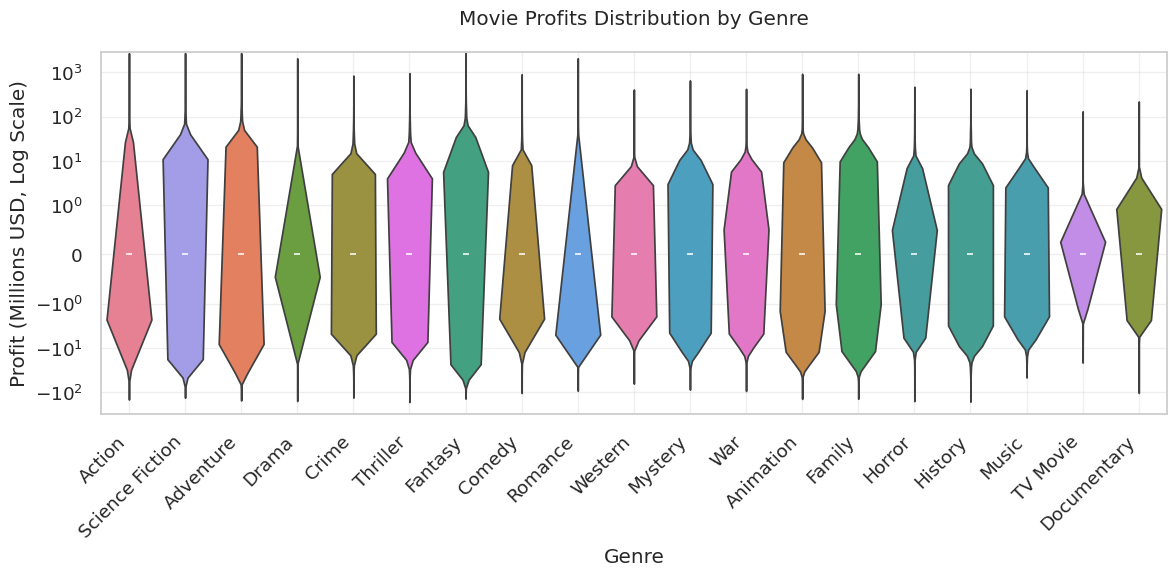

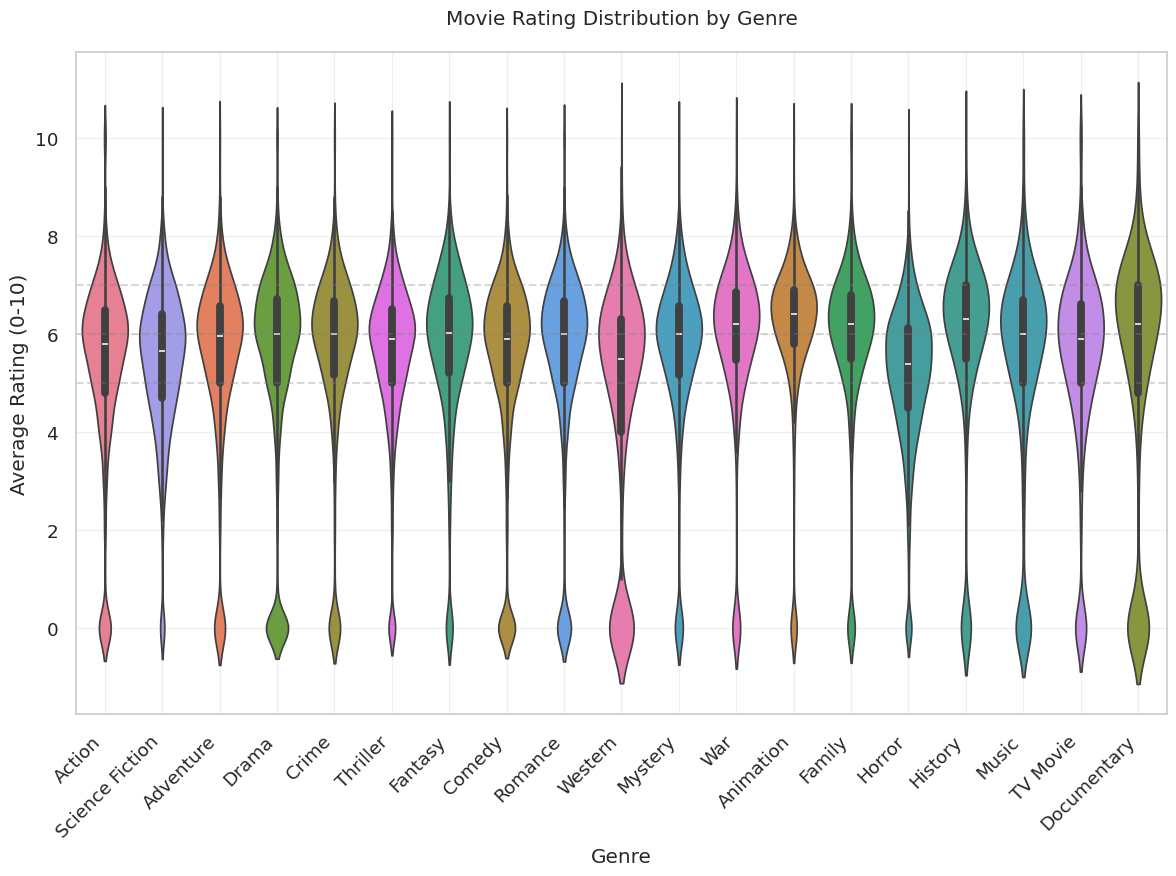

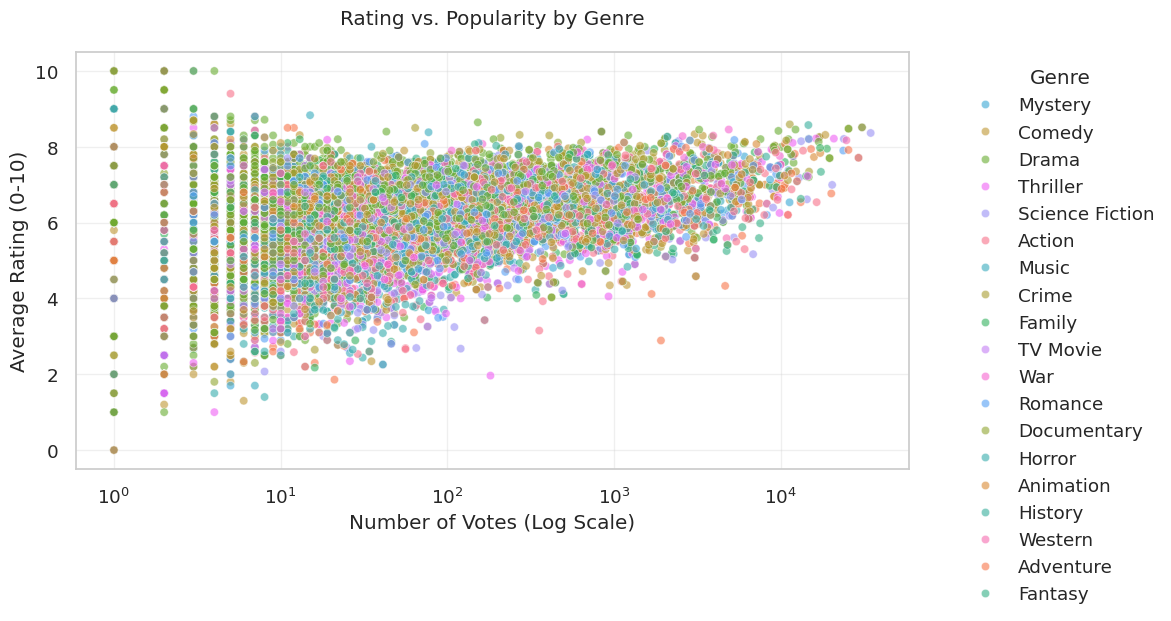

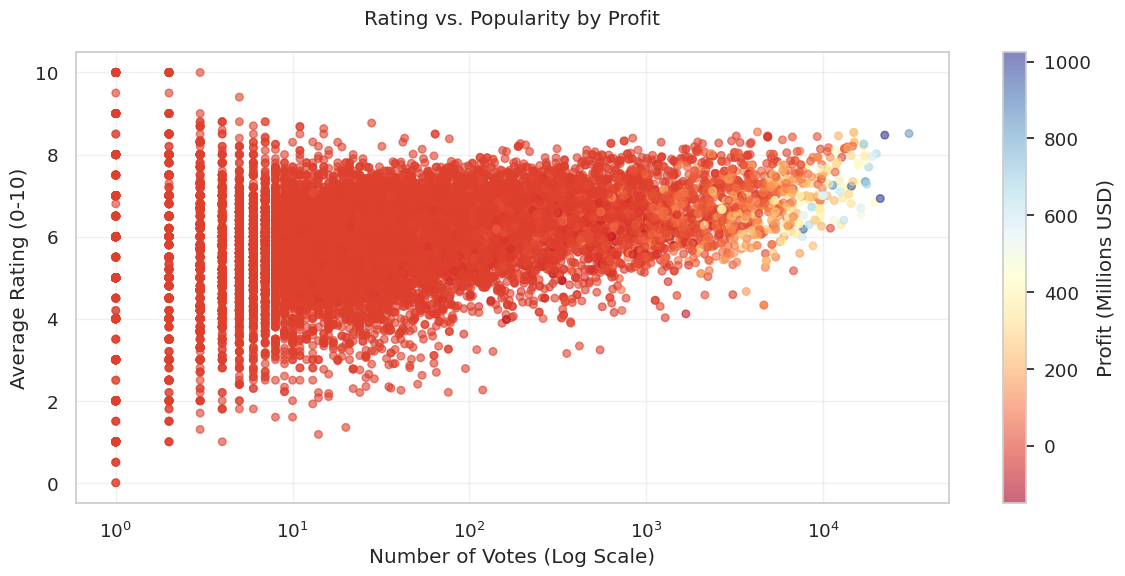

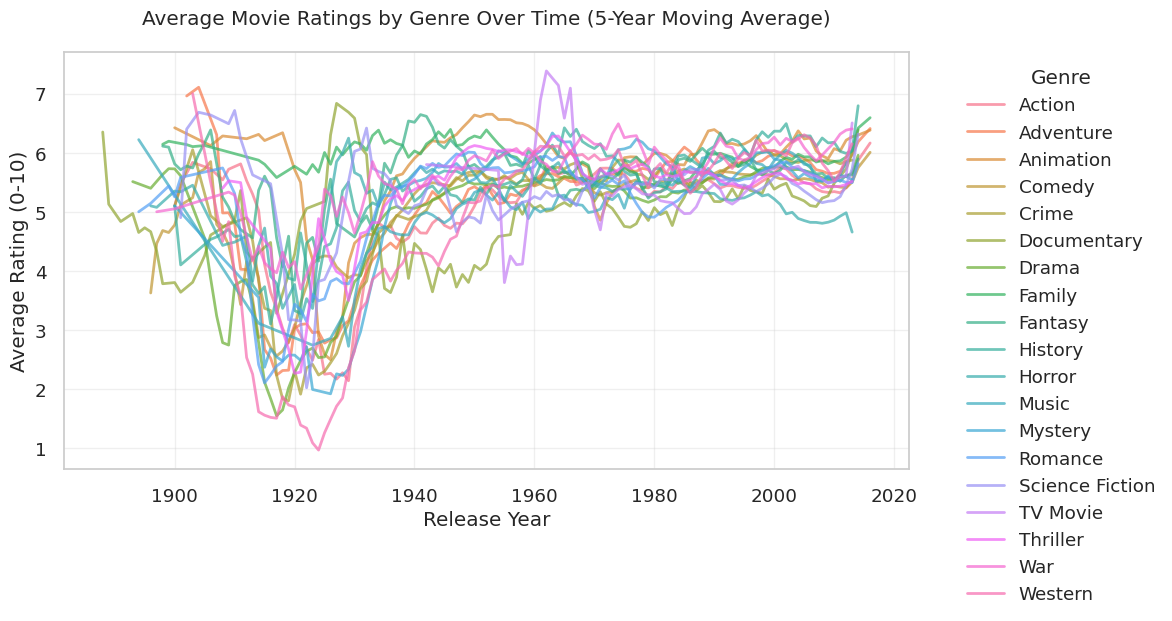


Overall ROI Statistics (cleaned):
count    5637.000000
mean        3.235608
std         7.884192
min        -0.989931
25%        -0.198579
50%         0.987574
75%         3.029376
max        50.000000
Name: roi_clean, dtype: float64


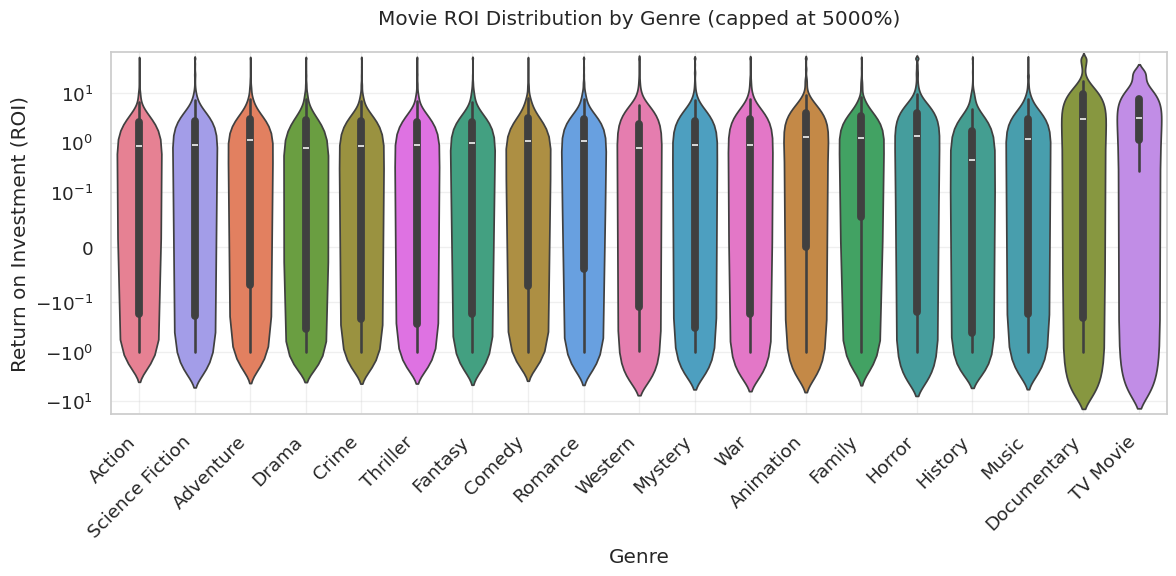


ROI Statistics by Budget Category (excluding zero budgets):
                roi_clean                     budget                     
                    count   mean median         mean       min        max
budget_category                                                          
Very Low              561  10.53   2.84    268873.33         1     840000
Low                   987   4.93   1.46   2223100.19    846000    4000000
Medium               1069   2.66   0.82   7346909.57   4015000   11000000
High                 1422   1.67   0.50  18571102.74  11300000   28000000
Very High            1598   1.41   0.87  65080901.05  29000000  379000000


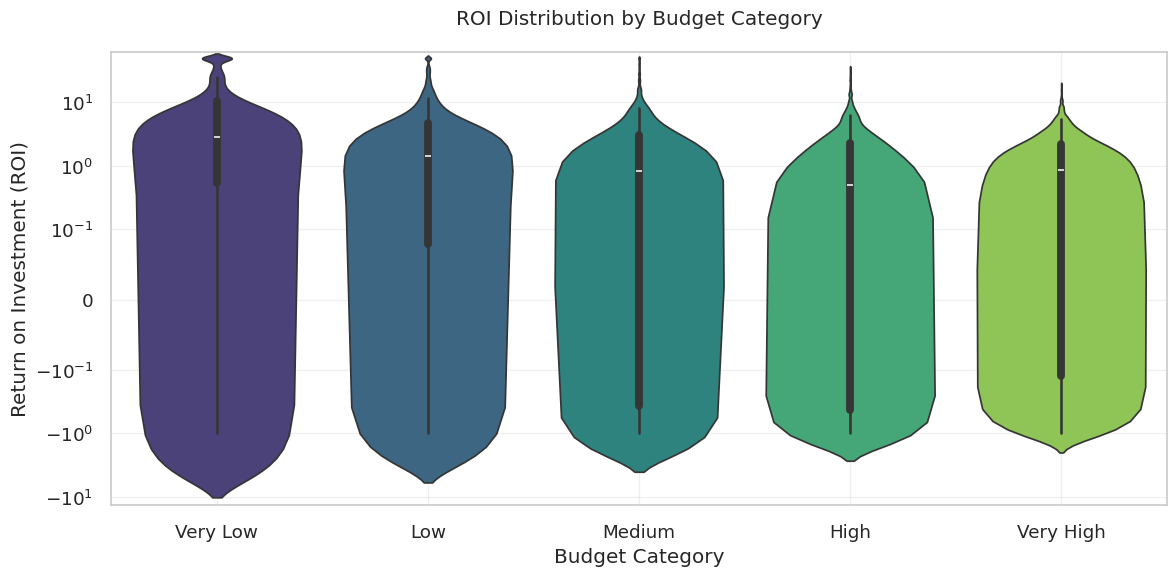


Performance Rates by Genre:
                 Total Loss (>90%)  Severe Loss (>70%)  \
Action                         0.7                 2.1   
Adventure                      0.6                 2.2   
Animation                      0.2                 0.9   
Comedy                         0.5                 1.3   
Crime                          0.8                 2.0   
Documentary                    0.2                 0.4   
Drama                          0.7                 1.6   
Family                         0.3                 1.0   
Fantasy                        0.6                 1.6   
History                        0.4                 2.5   
Horror                         0.8                 1.8   
Music                          0.5                 1.2   
Mystery                        1.0                 2.3   
Romance                        0.6                 1.4   
Science Fiction                1.0                 2.4   
TV Movie                       0.0         

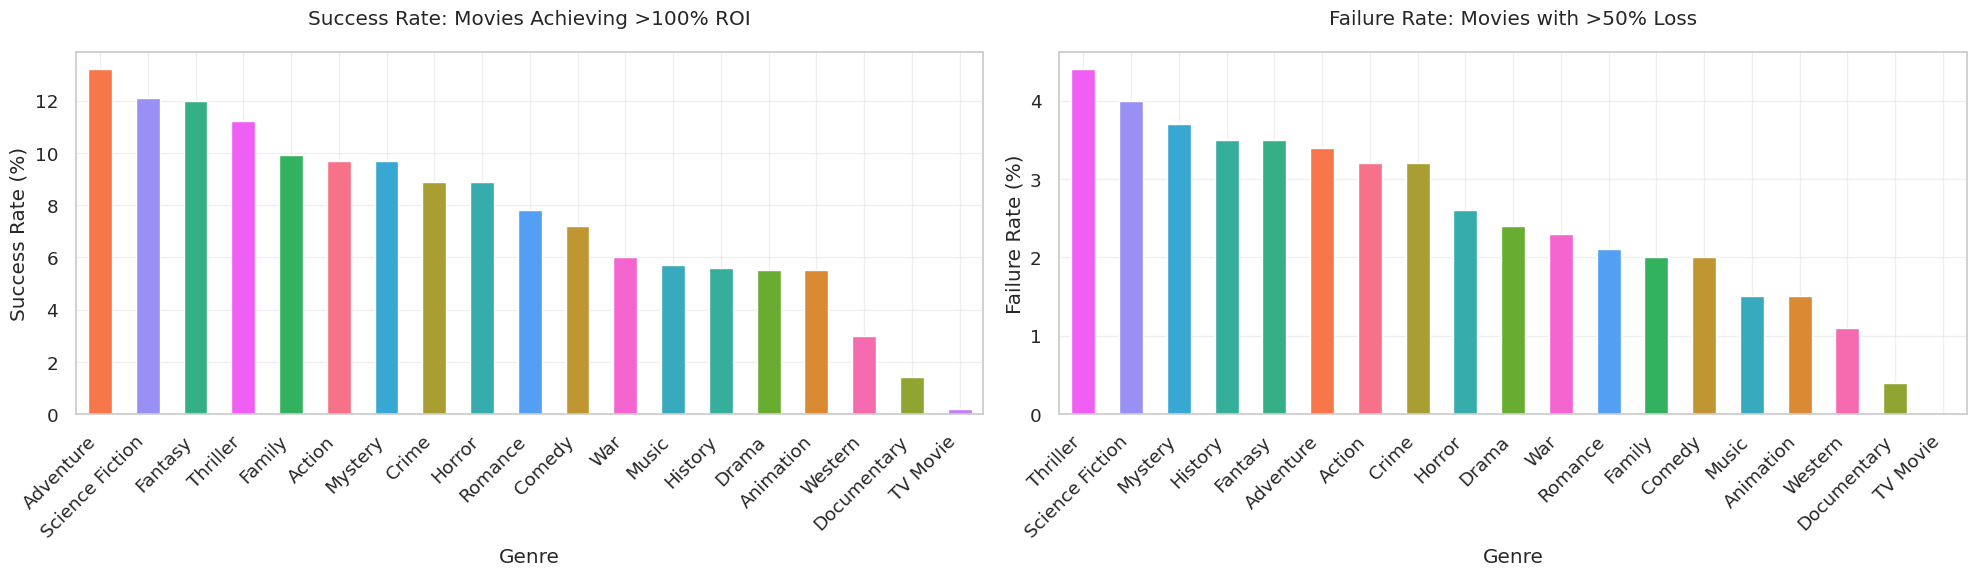


Summary Statistics by Genre:
                profit_scaled        vote_average        roi_clean       
                         mean median         mean  count      mean median
genres                                                                   
Action                  13.47    0.0         5.34   6410      2.45   0.85
Adventure               25.54    0.0         5.43   3656      2.83   1.10
Animation               13.08    0.0         6.01   2533      3.84   1.32
Comedy                   6.22    0.0         5.30  14528      2.85   1.06
Crime                    5.67    0.0         5.52   5059      2.61   0.85
Documentary              0.72    0.0         5.19   2535      9.03   2.94
Drama                    3.47    0.0         5.30  22560      2.94   0.76
Family                  15.86    0.0         5.85   3158      3.07   1.26
Fantasy                 23.92    0.0         5.70   2073      2.56   0.96
History                  3.79    0.0         5.78   1582      2.09   0.44
Horror  

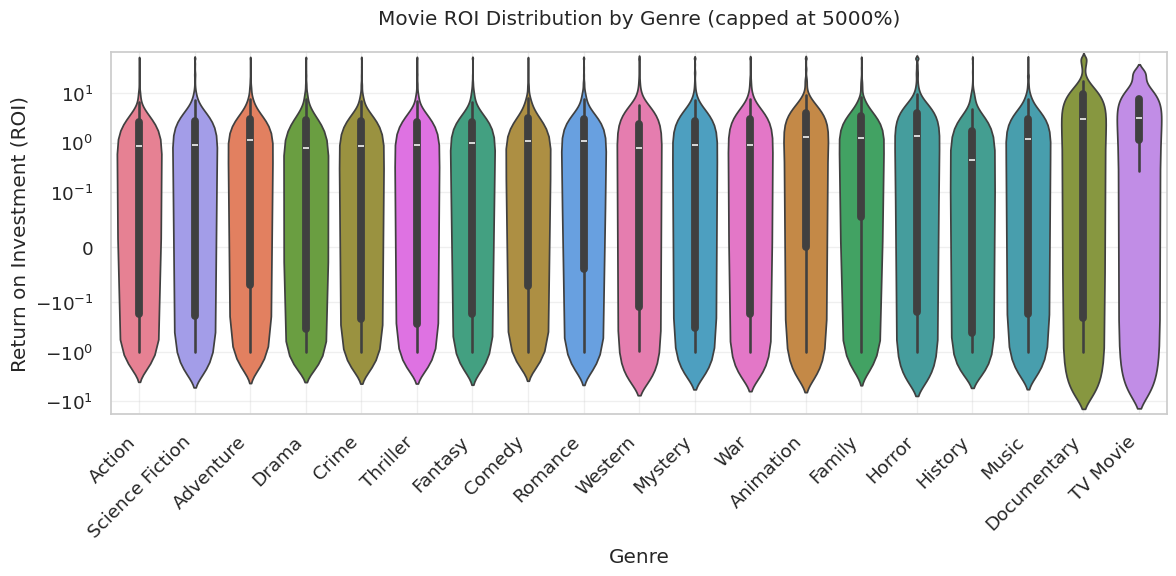


Performance Rates by Genre:
                 Total Loss (>90%)  Severe Loss (>70%)  \
Action                         0.7                 2.1   
Adventure                      0.6                 2.2   
Animation                      0.2                 0.9   
Comedy                         0.5                 1.3   
Crime                          0.8                 2.0   
Documentary                    0.2                 0.4   
Drama                          0.7                 1.6   
Family                         0.3                 1.0   
Fantasy                        0.6                 1.6   
History                        0.4                 2.5   
Horror                         0.8                 1.8   
Music                          0.5                 1.2   
Mystery                        1.0                 2.3   
Romance                        0.6                 1.4   
Science Fiction                1.0                 2.4   
TV Movie                       0.0         

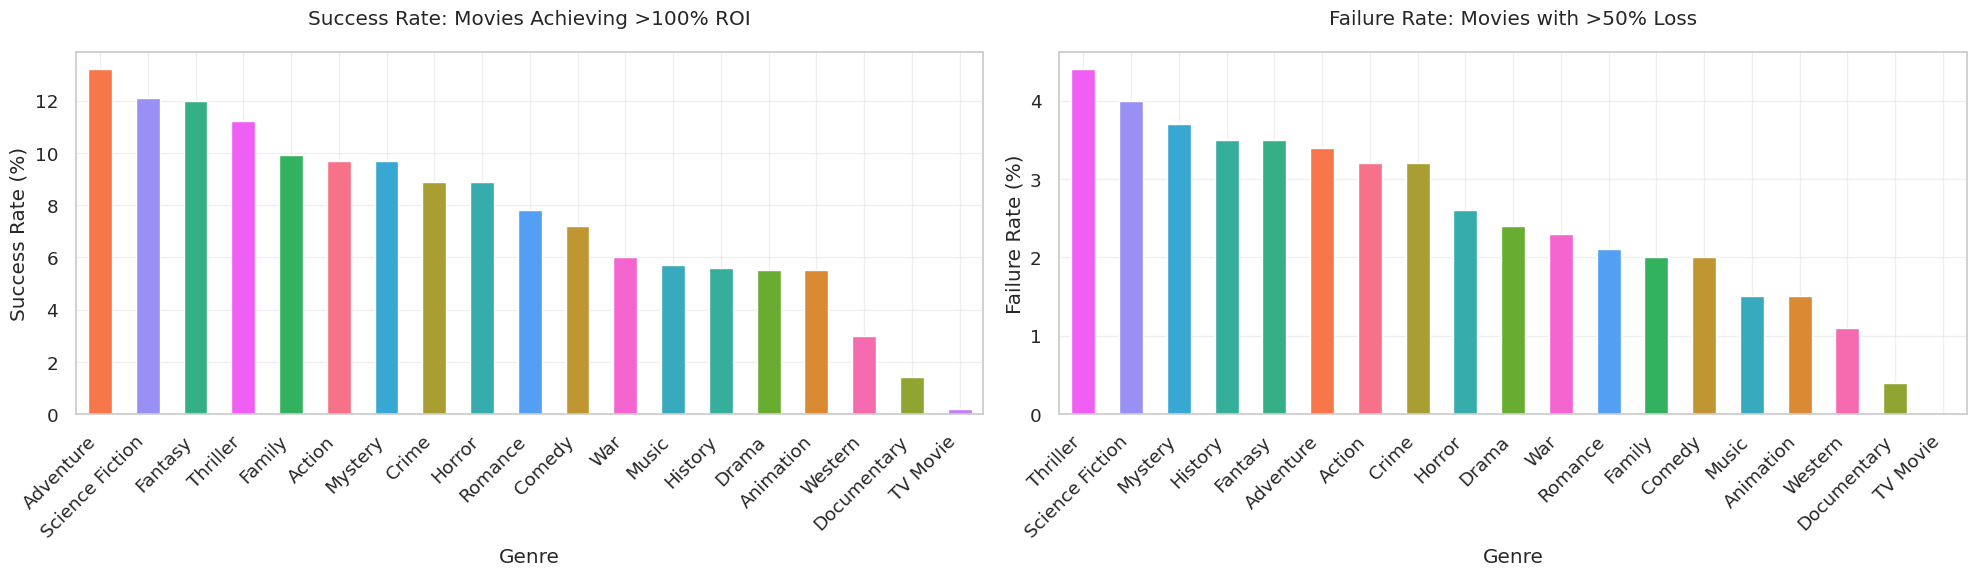

In [14]:
## code
from src.utils.genre_analysis import *

df, df_genres = prepare_data("data/cmu_tmdb.csv")
unique_genres = sorted(df_genres["genres"].unique())
genre_colors = create_genre_colors(unique_genres)

# Basic Analysis
plot_genre_distributions(df_genres, genre_colors)

# Performance Analysis
plot_genre_performance(df_genres, genre_colors)

# Temporal Analysis
analyze_temporal_trends(df_genres, genre_colors, unique_genres)

# ROI Analysis
df, df_genres = analyze_roi(df, df_genres, genre_colors)

# Budget Analysis
budget_stats = analyze_budget_categories(df)

# Success/Failure Rate Analysis
performance_stats = analyze_success_failure_rates(
    df_genres, genre_colors, unique_genres
)

# Summary Statistics
summary_stats = get_summary_statistics(df_genres)

df = run_complete_interactive_analysis("data/cmu_tmdb.csv")['df']

#### 4.1 What we have done for the initial analysis

We employed several analytical approaches to understand genre impact on movie failure. 

- First, we used violin plots with symmetric log scaling to visualize profit distribution across genres, capturing both the central tendency and spread of financial performance. 
- To understand cultural reception, we analyzed the relationship between ratings and popularity (measured by vote count) using scatter plots with logarithmic scaling for vote counts. 
- We tracked genre performance over time using 5-year moving averages to identify long-term trends in audience reception. 
- Finally, we calculated and compared genre-specific success and failure rates to identify which genres carry the highest risk of significant financial loss.


#### 4.2 Key observations

##### Financial Performance by Genre

1. High-Profit Potential:

- Action/Adventure/Fantasy lead in extreme profits (mean profits: 13-25M USD)
- Documentary/TV Movies show lowest profits but highest ROI (9.03 and 7.13)
- Horror shows strong ROI (5.69) with moderate investment
- Drama (most common genre, 22,560 movies) shows modest profits (3.47M USD)

2. Budget Impact:

- Very low budget films: Highest ROI potential but highest volatility
- High budget films: More consistent but lower returns
- Clear inverse relationship between budget size and ROI potential

##### Audience Reception

1. Ratings:

- Animation leads with highest average rating (6.01)
- Family/War films follow with strong ratings
- Western shows lowest ratings
- Most genres maintain 5-7 rating range
- Documentary shows most consistent ratings

2. Popularity Patterns:

- Popular movies (high vote counts) cluster around 6-7 ratings
- Less popular movies show wider rating variation
- Profitable movies typically have high vote counts
- Genre impact on popularity is minimal

##### Historical Trends

- Ratings stabilized post-1960
- High volatility in early years (pre-1940)
- Modern convergence around 5-6 rating range
- Genre distinctions decreased over time

##### Risk Assessment

1. Success Rates:

- Adventure/Science Fiction/Fantasy: Highest success rates
- Documentary/TV Movies: Extreme success/failure patterns
- Horror: Good success rate with moderate risk

2. Failure Rates:

- Thriller/Science Fiction/Mystery: Highest failure rates
- Action/Adventure: More moderate failure rates despite high budgets
- Documentary: High risk but high potential return

##### Key Takeaway

Genre significantly impacts financial performance and risk levels. While Action/Adventure/Fantasy lead in absolute profits, smaller genres like Documentary and Horror show strong ROI potential. Ratings remain relatively consistent across genres, with Animation and Family films maintaining slight advantages. Budget size shows stronger correlation with returns than genre choice.


### 5. How does poor release timing (e.g., season, holiday periods) affect a movie's likelihood of failing?

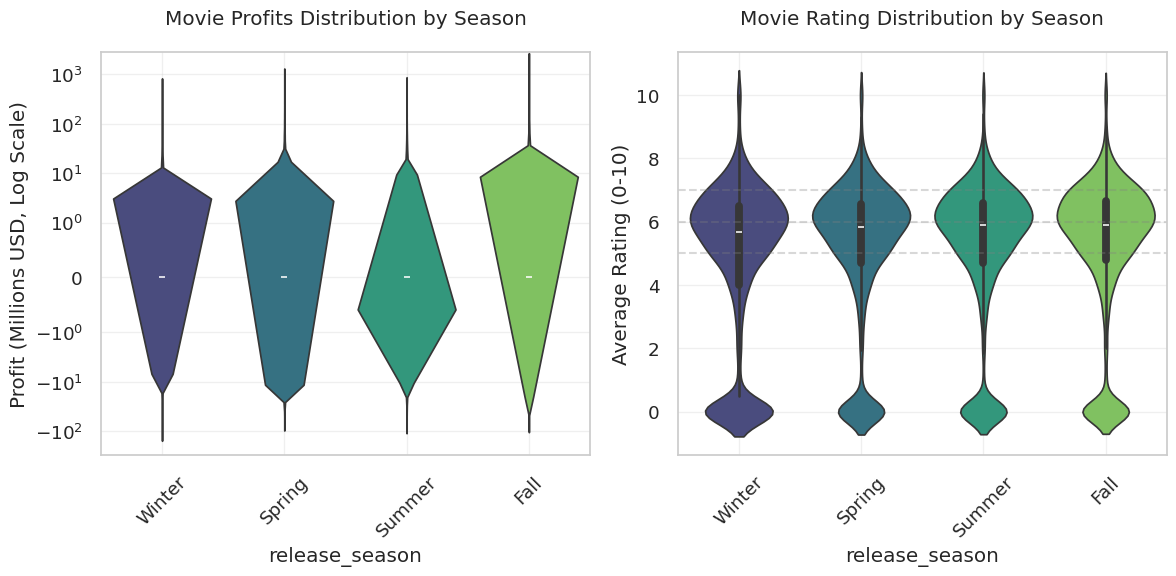


Summary Statistics by Season:
               profit_scaled        vote_average        roi_clean       
                        mean median         mean  count      mean median
release_season                                                          
Winter                  2.56    0.0         4.72  13059      2.77   0.87
Spring                  7.23    0.0         5.10  11446      3.31   1.16
Summer                  4.33    0.0         5.13  11944      3.27   0.79
Fall                    5.93    0.0         5.19  13070      3.46   1.04


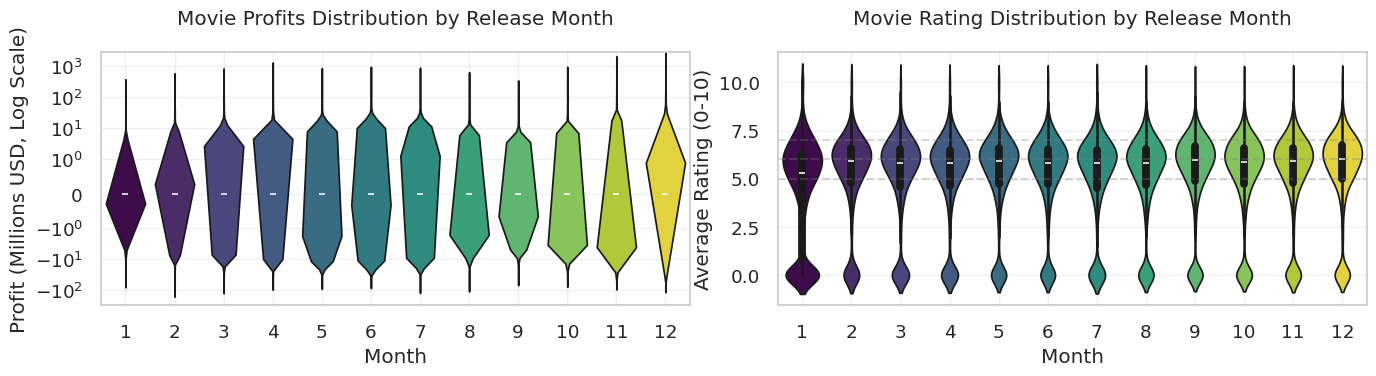

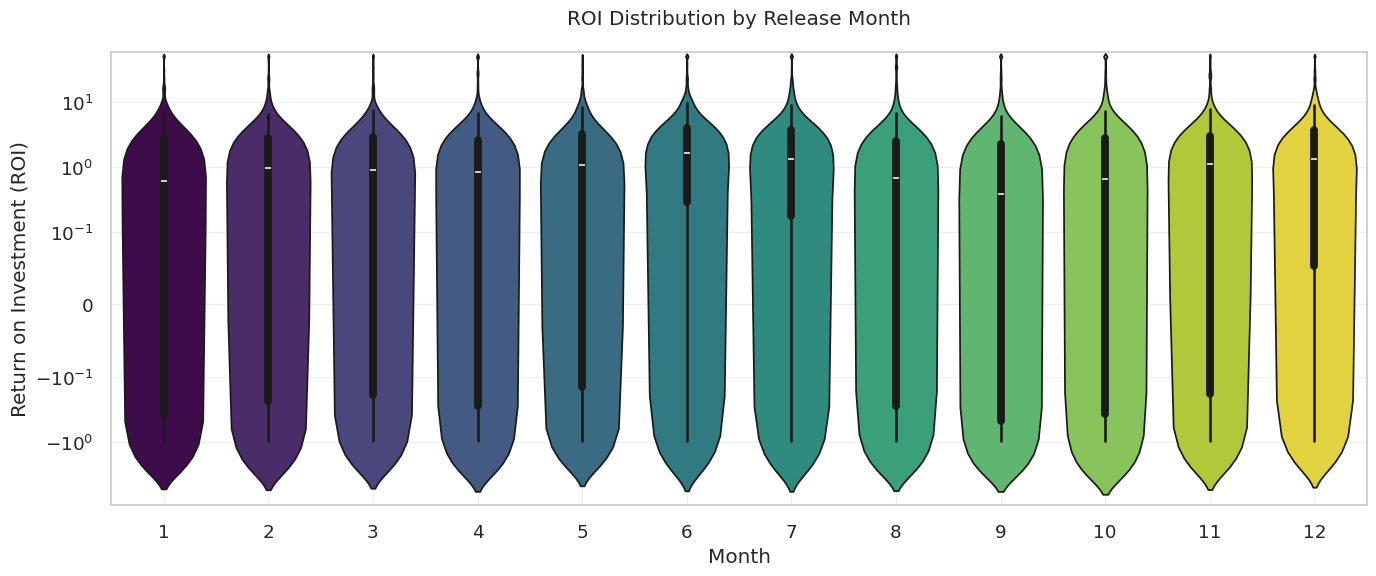

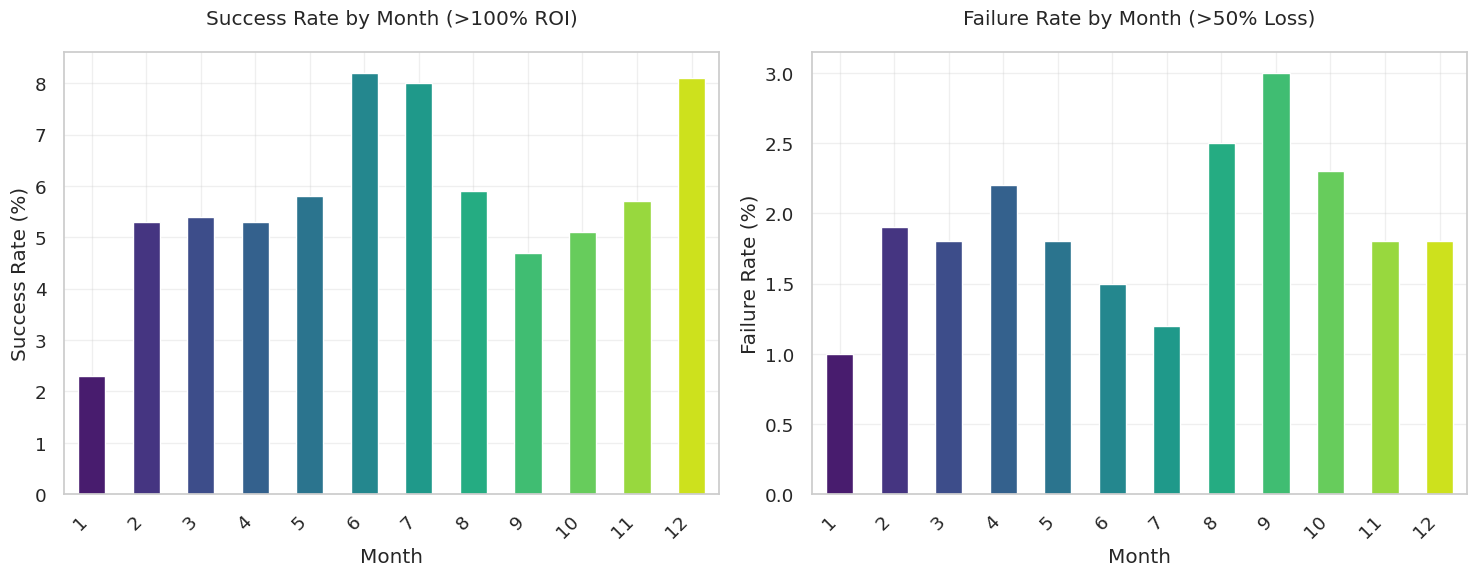

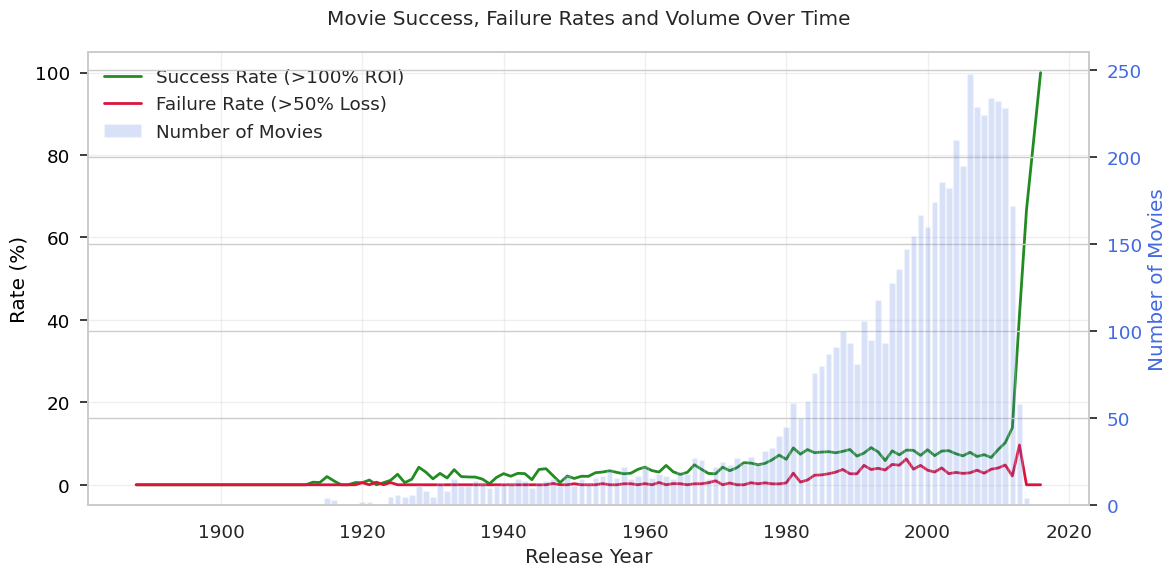

{'seasonal_stats':                 profit_scaled  vote_average  roi_clean
 release_season                                        
 Winter                   2.56          4.72       4.03
 Spring                   7.23          5.10       6.39
 Summer                   4.33          5.13       5.98
 Fall                     5.93          5.19       6.27,
 'monthly_stats': {'profit':                 mean    std  median  percentile_25  percentile_75
  release_month                                                    
  1               0.92  11.27     0.0            0.0            0.0
  2               3.10  21.83     0.0            0.0            0.0
  3               4.53  32.99     0.0            0.0            0.0
  4               3.57  35.90     0.0            0.0            0.0
  5               7.37  53.08     0.0            0.0            0.0
  6              10.89  62.26     0.0            0.0            0.0
  7               8.85  52.49     0.0            0.0            0.0
  8   

In [15]:
## code
from src.utils.timing_analysis import *

# Seasonal Analysis
seasonal_stats = plot_seasonal_distributions(df)

# Monthly Analysis
analyze_monthly_performance(df)

# Monthly ROI Analysis
monthly_perf_df = analyze_monthly_roi(df)

# Monthly Success Rate Analysis
plot_monthly_success_rates(monthly_perf_df)

# Monthly Statistics
monthly_stats = analyze_monthly_statistics(df, monthly_perf_df)

# Yearly Analysis
yearly_performance = analyze_temporal_trends(df)

run_interactive_timing_analysis(df)

#### 5.1 What we have done for the initial analysis

- To investigate how release timing affects movie failure, we analyzed the distribution of profits and ratings across different temporal categories using violin plots. 
- We compared failure rates across seasons and months to identify particularly risky release periods. 
- To account for industry evolution, we examined the temporal trends of success and failure rates alongside movie release volume using a dual-axis visualization combining line graphs for rates and bar charts for release counts. 

This allowed us to identify historical patterns in optimal release timing while controlling for changes in industry output volume.


#### 5.2 Key observations

##### Seasonal Patterns

1. Profitability and ROI:

   - Fall shows best overall performance (high ROI: 3.46, good profit distribution)
   - Spring has highest mean profit (7.23M USD) and median ROI (1.16)
   - Winter consistently underperforms (lowest profit: 2.56M USD, lowest ROI: 2.77)
   - Summer shows moderate, stable performance

2. Ratings and Volume:

   - Ratings remain relatively consistent across seasons (range: 4.72-5.19)
   - Winter/Fall have highest release volumes (~13,000 movies each)
   - Spring/Summer have fewer releases (~11,500 movies each)

##### Monthly Patterns

1. Strong Months:

   - June/July: Highest success rates (~8%), good ROI potential
   - December: Strong performance (high success rate, good profit potential)
   - Summer months generally show better profit concentration

2. Weak Months:

   - January: Lowest success rate (~2%), volatile ROI
   - August/September: Highest failure rates (~3%)
   - Early fall months show increased risk

##### Historical Trends

- Movie volume increased significantly since 1980s
- Success/failure rates remained relatively stable until recent years
- Post-2000 shows increased volatility
- Possible data anomaly showing success spike near 2020

##### Key Takeaway

Best release windows appear to be summer months (June/July) and December, while January and early fall carry higher risks. Fall and Spring show strongest overall financial metrics, but Winter consistently underperforms across all measures.


<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 15px; background-color: #E8F5E9; color: #333;">
    <strong>📖 Narrative & Thematic Elements</strong> 
</div>

A trope is a commonly recurring store-telling device in creative works. In film, tropes can be anything from narrative patterns (like the "last-minute rescue") to character archetypes (like the "mad scientist"), or even specific plot devices (like "time-traveling mishaps"). While tropes aren't inherently good or bad, their execution and context largely determine their effectiveness in storytelling.

This analysis examines tropes that appear disproportionately often in poorly-rated films. Our first step is identify the most common tropes in low-rated films, to then explore each genre individually, and finally compare the results across genres.

In [16]:
from src.utils.trope_analysis import *

df_cmu_tropes = pd.read_csv("data/cmu_tropes.csv")

### 6. What recurring plot patterns appear most frequently in critically panned films?

In [17]:
rq6(df_cmu_tropes)

Number of unique tropes: 23667
Number of unique movies: 2549
Shape of the filtered dataset: (203581, 11)
Genre All has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Action has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Adventure has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Comedy has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Crime has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Drama has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Family has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Fantasy has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Horror has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Mystery has 10 tropes with a ratio of low-rated movies to high-rated movies
Genre Romance has 10 tropes with a ratio of low-rated movies to high-rated movies
Gen

#### 6.1. What we have done for the analysis

To explore the relationship between narrative tropes and audience reception, we first established a rating threshold of 6.0 on a 10-point scale to distinguish between low and high-rated movies. Starting with low-rated films, we identified the 20 most common tropes and visualized their frequencies using a bar plot.

#### 6.2. Key observations

* The mean vote average for the dataset was 5.44, with a median of 5.6 after filtering out movies rated 6 or lower.
* The top 20 most common tropes in low-rated films were identified, with "ShotOut," "HorrorFilms," "FilmsOfThe1980s," "BigBad," and "LargeHam" being the top 5, each appearing in over 80 films.

Now, we will analyze the distribution of these tropes across different genres.

### 7. Which tropes consistently lead to negative reception by genre?

#### 7.1. What we have done for the initial analysis

We focused our initial analysis on three specific genres: Horror, Adventure, and Comedy. For each genre, we categorized films into low-rated (≤6.0) and high-rated (>6.0) groups and analyzed the tropes associated with each category. To highlight tropes that were disproportionately present in poorly received films, we calculated the ratio of trope occurrences in low-rated films to high-rated films. Finally, we visualized the top 10 tropes with the highest low-to-high rating ratios for each genre to identify patterns that might contribute to negative audience reception. The y-axis lists the tropes, while the x-axis shows the ratio of appearance in low-rated vs. high-rated films.

#### 7.2. Key observations

Key observations for horror films:

* "HotScientist" has the highest ratio (about 7x), suggesting this character trope rarely works well in horror films
* "TookTheBadFilmSeriously" and "BadSanta" (both around 5x) are the next highest ratios, indicating that earnest performances in poor films and evil Santa narratives tend to correlate with lower ratings

Key observations for adventure films:

* "NotScreenedForCritics" has the highest ratio (about 4x), suggesting films not shown to critics beforehand tend to be lower quality
* Action-related tropes like "ActionDressRip" and "DoesntLikeGuns" appear frequently in lower-rated films, suggesting certain action elements may be harder to execute well

Key observations for comedy films:

* "ContinuityReboot" tops the list (around 8x), indicating that comedy reboots of existing properties tend to be particularly challenging to execute well
* "AHandfulForAnEye" and "NotScreenedForCritics" (both around 6x) are also common in poorly-rated comedies
* Horror-related tropes like "SlasherFilm" and "SlasherMovie" appear in poorly-rated comedies, suggesting horror-comedy crossovers may be difficult to execute successfully

### 7. What plots are the most common in movies that fail?

To understand which narrative elements might contribute to poor movie reception, we first analyzed individual tropes associated with the lowest average ratings. We then examined how these problematic tropes tend to appear together in films, identifying patterns in their co-occurrence and exploring potential combinations that might predict poor audience reception.

The box plot displays the rating distributions for the ten tropes associated with the lowest average ratings in our dataset. Most tropes show average ratings between 4 and 6, with considerable variation as indicated by the long whiskers.

In [18]:
rq7(df_cmu_tropes)

### Cluster analysis

To analyze the relationship between movies and their associated tropes, we developed a binary vector representation approach. Each movie in our dataset is represented by a sparse binary vector where the dimension equals the total number of unique tropes in our dataset. Within each vector, a value of 1 indicates the presence of a trope in the movie, while 0 indicates its absence.

We applied the k-means clustering algorithm to our binary vector representations to identify groups of movies with similar trope patterns. We selected k=50 clusters as our target, hypothesizing that this number would provide meaningful groupings of movies based on their trope compositions. The underlying assumption is that movies sharing similar tropes are likely to have similar narrative structures, themes, or plot elements.
The k-means algorithm iteratively assigns movies to the nearest cluster center and updates these centers based on the average of assigned movies until convergence. This process results in 50 distinct clusters of movies, where each cluster contains films that share similar patterns of trope usage.

In [19]:
df_tropes = pd.read_csv("data/tropes/tropes.csv", index_col=0)

movie_tropes_data, clusters, movie_embeddings = cluster_movies(df_cmu_tropes, df_tropes, 50, len(df_tropes))

df_cmu_tmdb_filtered = df_cmu_tmdb[df_cmu_tmdb["id"].isin(movie_embeddings.keys())]
df_cmu_tmdb_filtered = df_cmu_tmdb_filtered.drop_duplicates(subset=["id"])
df_cmu_tmdb_filtered["cluster"] = clusters.labels_

Cluster labels shape: (5476,)
Number of samples in each cluster: [ 115  148   53   64   37   90   62   54   92   94   60   38   14  185
   62  131   64   46  208 1757  208   53   18   84   12   36   30  122
  147  105   54  218   43  111   94   24  134   40   36   68   46  104
   87   24   18   31   86   26   25   18]
Cluster centers shape: (50, 30984)


This next visualization presents a t-SNE reduction of our movie clusters into two dimensions, revealing how different movies relate to each other based on their trope patterns.
While there is significant overlap between clusters in the dense central region, suggesting many movies share common trope patterns, we can also observe some distinct regions where certain clusters dominate. Some outlier points around the edges of the plot might represent movies with unique combinations of tropes.

In [20]:
plot_movie_clusters(movie_tropes_data, clusters)

To understand what trope combinations might lead to poor audience reception, we isolated the ten clusters with the lowest average ratings from our dataset. The t-SNE visualization of these clusters reveals a notable pattern: most poorly-rated movies concentrate in a dense cluster, with some outliers scattered across the periphery. This concentration suggests that many poorly-rated movies share similar trope combinations, potentially indicating specific narrative patterns that consistently fail.

Unlike the full dataset visualization, which showed more uniform distribution, these worst-rated clusters display significant clumping. The presence of isolated points at the edges of the plot suggests that while most poorly-rated movies follow similar trope patterns, there are also some films that receive bad ratings despite having unique or unusual trope combinations. This insight could be valuable for filmmakers, as it highlights both common problematic trope patterns to avoid.

In [21]:
plot_worst_clusters(df_cmu_tmdb_filtered, movie_tropes_data, clusters, 10)

The bar chart reveals the most frequently occurring problematic trope combinations in our worst-rated movie clusters, with horror films dominating the top positions. The combination of "HorrorFilms + FinalGirl + ShoutOut" appears most frequently, followed by other horror-related combinations involving B-movies and slasher films. This suggests that certain horror movie formulas, particularly those that rely heavily on traditional tropes, tend to receive poor ratings.

Beyond horror, we see recurring patterns in other genres: dirty cop narratives, recursive or self-referential storytelling (as shown by "AlliterativeTitle + RecursiveCanon + RecursiveFiction"), and psychological thrillers with specific social themes. The presence of "BigBad + FilmsOfThe1980s + TheDragon" suggests that dated villain archetypes from the 1980s may not do well with modern audiences. These combinations point to potential narrative fatigue, where audiences may be responding negatively to overly familiar or poorly executed trope patterns.

In [22]:
worst_clusters_tropes = compute_worst_clusters_tropes(df_cmu_tmdb_filtered, df_cmu_tropes)
plot_trope_combinations(worst_clusters_tropes)

Finally, our network visualization reveals the connection between tropes in poorly-rated movies, with "HorrorFilms" emerging as the central node with the largest size, indicating its high frequency. The network shows strong connections between horror-related tropes, forming a dense cluster that includes "SlasherFilm," "BMovie," and "SciFiHorror." This central cluster connects to more specific tropes like "FinalGirl," "DeathBySex," and "TooDumbToLive," suggesting that these narrative elements frequently appear together in poorly-received films.

The presence of "FilmsOfThe1980s" with connections to "TheDragon" and "BigBad" indicates a pattern of dated storytelling formulas, while the edges connecting various horror sub-genres suggest that movies combining multiple horror tropes tend to receive lower ratings. The thickness of the connecting lines reveals particularly strong co-occurrences between certain tropes, highlighting common but potentially problematic narrative combinations in these lower-rated films.

In [23]:
plot_trope_network(worst_clusters_tropes)

### 8. How have low-rated tropes evolved over time, and what trends can be observed in their average ratings across different periods?

The time series plots reveal interesting patterns in how audience reception of different tropes has evolved from 1920 to present. Most tropes show average ratings fluctuating between 4 and 6, with notable volatility in earlier decades when fewer movies were released. "ChekhovsGun" shows the most stable and positive trend, with ratings gradually improving and stabilizing around 5.5 in recent decades, suggesting this narrative device has been refined over time.

"HorrorFilms" and "BMovie" display consistent average ratings throughout their history, though with considerable variation, typically ranging between 4 and 5. Interestingly, "FilmsOfThe1980s" shows relatively stable ratings during its peak period in the 1980s, hovering around 5, but the few movies using this trope outside that era show more extreme variations in ratings.

In [24]:
rq8(df_cmu_tropes)

Initial shape: (256008, 11)
Number of rows after filtering: (1509, 11)
